<a href="https://colab.research.google.com/github/onkardc/Homework_3/blob/main/Homework3_DO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,9]

Saturation pressure of water (at T = 20degC) = 17.473251342773438
Saturation pressure of 1,4-dioxane (at T = 20degC) = 28.824098587036133
A12 = 1.9578605
A21 = 1.6896445
Loss function = 0.67023647
Measured values of p = [28.1 34.4 36.7 36.9 36.8 36.7 36.5 35.4 32.9 27.7 17.5]
Calculated values of p = [28.824099 34.641922 36.451233 36.866104 36.87291  36.748795 36.389854
 35.38533  32.949886 27.733051 17.473251]
Difference in calculated and measured values of p = [-0.7240982  -0.24192047  0.24876785  0.0338974  -0.07291031 -0.04879379
  0.11014557  0.01467133 -0.0498848  -0.03305054  0.02674866]


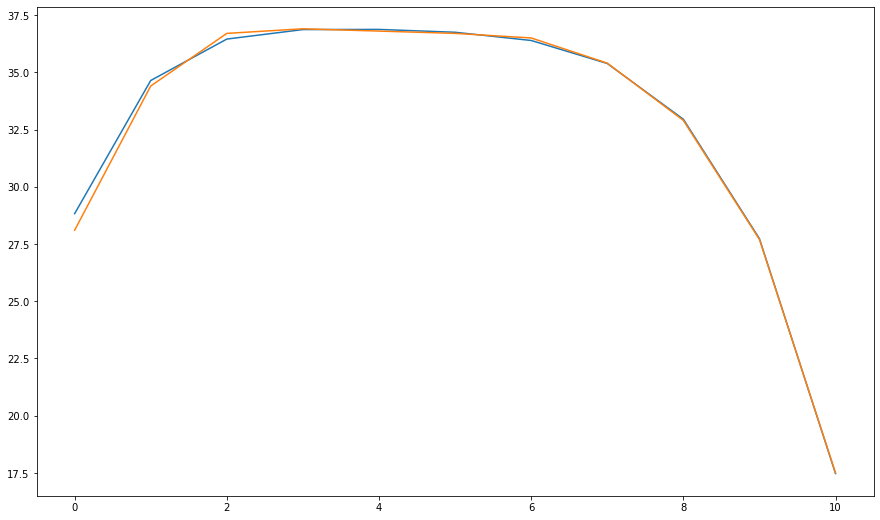

In [15]:
x1 = Variable(t.tensor([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]), requires_grad=False)
p = Variable(t.tensor([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5]), requires_grad=False)

T = 20 
a1=[8.07131, 1730.63, 233.426] #a1 = a_water
a2=[7.43155, 1554.679, 240.337] #a2 = a_1,4-dioxane

# Saturation pressures for 1 and 1,4-dioxane

psat1 = Variable(t.tensor(10**(a1[0]-(a1[1]/(T+a1[2])))), requires_grad=False)
psat2 = Variable(t.tensor(10**(a2[0]-(a2[1]/(T+a2[2])))), requires_grad=False)
print('Saturation pressure of water (at T = 20degC) =', psat1.item())
print('Saturation pressure of 1,4-dioxane (at T = 20degC) =', psat2.item())

eps = 1e-1 # Termination criterion
A = Variable(t.tensor([10.0, 5.0]), requires_grad=True)

func = lambda A, x1, psat1, psat2:\
        t.dot((p-(x1*psat1*t.exp((A[0]*(A[1]*(1-x1))**2/((A[0]*x1+A[1]*(1-x1))**2)))\
        + (1-x1)*psat2*t.exp((A[1]*((A[0]*x1)**2)/((A[0]*x1+A[1]*(1-x1))**2))))),\
        (p-(x1*psat1*t.exp((A[0]*(A[1]*(1-x1))**2/((A[0]*x1+A[1]*(1-x1))**2)))\
        + (1-x1)*psat2*t.exp((A[1]*((A[0]*x1)**2)/((A[0]*x1+A[1]*(1-x1))**2))))))

def line_search(A,x1,psat1,psat2): #Performing Amijo Line Search
    a = 1.0
    phi = lambda a, A, x1, psat1, psat2: func(A,x1,psat1,psat2) - a * 0.8 * A.grad @ A.grad.transpose(0,0)
    while phi(a,A,x1,psat1,psat2) < func((A - a * A.grad),x1,psat1,psat2):
      a = 0.5 * a
    return a

err = 1

while err >= eps: # Solving using gradiient descent
    loss = func(A,x1,psat1,psat2)
    loss.backward()
    err = A.grad.norm()
   
    with t.no_grad():
        a = line_search(A,x1,psat1,psat2)
        A -= a*A.grad
        A.grad.zero_()

#predp = predicated value of p
predp = (x1*psat1*t.exp((A[0]*(A[1]*(1-x1))**2/((A[0]*x1+A[1]*(1-x1))**2)))\
        + (1-x1)*psat2*t.exp((A[1]*((A[0]*x1)**2)/((A[0]*x1+A[1]*(1-x1))**2))))

print('A12 =',A[0].data.numpy())
print('A21 =',A[1].data.numpy())
print('Loss function =',loss.data.numpy())
print('Measured values of p =',p.data.numpy())
print('Calculated values of p =',predp.data.numpy())
print('Difference in calculated and measured values of p =', (p-predp).data.numpy())

plt.plot(predp.data.numpy())
plt.plot(p.data.numpy())

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor

def func(x):
    return ((4 - x[0]**2 + (x[0]**4)/3)*x[0]**2+x[0]*x[1]+(-4+4*x[1]**2)*x[1]**2)

X1 = np.linspace(-3,3,300)
X2 = np.linspace(-2,2,300)
x = np.array([[x1, x2] for x1 in X1 for x2 in X2])
fx = [func(x_i) for x_i in x]
plt.plot(fx,'r--',label = "function")
plt.plot(x,'-')
plt.xlabel("input_value")
plt.ylabel("Function")
plt.legend()
plt.grid()
plt.show()
[np.array(fx).argmin()]

x1,x2 = np.meshgrid(X1,X2)

bounds = np.array([[-3,3],[-2,2]])

xp,yp = GaussianProcessRegressor(n_iters=30,sample_loss=func,bounds=bounds,n_pre_samples=5,random_search=100000)

print(xp[-1])
print(yp[-1])

ImportError: ignored

In [18]:
%run ./../../References/gp.py

ERROR:root:File `'./../../References/gp.py'` not found.


In [23]:
import sklearn.gaussian_process as gp

n_iters = 100

# Choosing the number of pre-samples to the loss function (I arbitrarily chose 5)
n_pre_samples = 5

# Defining the function to be minimized
sample_loss = lambda x: (4-2.1*(x[0]**2)+(x[0]**4)/3)*x[0]**2+x[0]*x[1]+(-4+4*x[1]**2)*x[1]**2

# Defining the parameter bounds for x1 and x2
bounds = np.array([[-3,3],[-2,2]])

# Running the bayesian optimisation function with the predefined parameters, making sure to not use pure random search
xbaye, lossbaye = bayesian_optimisation(n_iters, sample_loss, bounds, x0 = None, n_pre_samples = 5,gp_params = None, random_search = None, alpha=1e-5, epsilon=1e-7)

# Creating a plot showing the progression of the optimization function as it optimized x1 and x2
plt.plot(np.linspace(1,(n_iters+n_pre_samples),(n_iters+n_pre_samples)), lossbaye)
plt.title('Plot of Loss Function Value vs. Iteration # for Bayesian Optimization')
plt.xlabel('Iteration #')
plt.ylabel('Loss Function Value')

# Printing the optimized value of x1 and x2 alongside the corresponding value for the loss function 
print('Optimized value of x1=', xbaye[-1,0])
print('Optimized value of x2=', xbaye[-1,1])
print('Corresponding value of loss function for optimized x1, x2 =', lossbaye[-1])

NameError: ignored